# XAI 2025 TP3

## Features and model selection - Exploration of FuzzyCoCo



Author: Arthur Babey 

Due: 9 april 2025, 23h59


    Based on the work of Diogo Leite (2019), Thibault Showing (2024)
    FuzzyCoCo algorithm based on the PhD thesis of Carlos Peña https://infoscience.epfl.ch/record/33110

- Professor: Carlos Peña (<a href="mailto:carlos.pena@heig-vd.ch">carlos.pena@heig-vd.ch</a>)
- Assistant 2025: Arthur Babey (<a href="mailto:arthur.babey@heig-vd.ch">arthur.babey@heig-vd.ch</a>)

Date: Spring 2025


# Instructions

Dans ce TP nous allons utiliser [un dataset](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009) contenant, pour différents vins, leur tenneur en certain composés chimiques ainsi qu'une note de qualité. 

But du TP:

0. Mettre en place l'environnement (sur Google Colab si l'installation de FuzzyCoCo ne fonctionne pas localement)
1. Explorer FuzzyCoCo sur un dataset simple
2. Créer un modèle via grid-search et cross-validation
3. Analyser les résultats
4. Visualiser les résultats



# 0. Preparatory stage

## Set up the environement

## Google Colab

Si vous utilisez Google colab, vous devrez importer les fichiers à chaque exécution et à la fin, veiller à bien sauvegarder votre notebook. La cellule ci-dessous créé les dossiers nécessaires.

## Installation de FuzzyCoCoPython

Nous allons utilisé une version de FuzzyCoCo disponible sur python grâce à des bindings du code source écris en C et C++, cette version est en cours de développement. Son installation devrait être possible sur toutes les OS mais il est nécessaire d'avoir une version de CMake installé. 

```
pip install git+https://github.com/arthurbabey/fuzzycocopython.git
````


## Installation de LFA Tools

Nous allons également utilisé LFA tools qui est une dépendance à FuzzyCoCoPython. Cette bibliothèque nous aide à simplement visualiser des systèmes flous ainsi nous permet de visualiser les modèles entrainées, des prédictions et l'ensemble des caractéristique des nos modèle de logique floues. 

```
pip install git+https://github.com/arthurbabey/lfa_toolbox.git
```


In [1]:
# Import all the libraries
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import numpy as np
import random

from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split


## Explore and prepare the dataset


The first step is to split our dataset into training and test parts (subsets). Modify this if necessary (shouldn't be).

- The path of your original dataset
- The path where you want to save the training data
- The path where you want to save the test data




In [2]:
# Read Dataset
# Indicate the path of the original DS HERE: 
# https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?resource=download

csv_path_file_name = './data/winequality-red.csv'

data_load = pd.read_csv(csv_path_file_name)
data_load.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


According to the data source, the quality is a note (integer) between 0 and 10. 
We will quickly binarize the quality by mapping the note to 0 and 1 using a threshold at 5. 

In [3]:
data_load["quality"] = (data_load["quality"] >= 6).astype(int)
data_load["quality"].unique()

array([0, 1])

Now we can do a binary classification


### Train-Test split

In [4]:
# Create the train/test split and reshape the data

X = data_load.iloc[:, 0:-1]
y = data_load.iloc[:,-1]

#Split it into train test split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,random_state=12, test_size=0.33, stratify=y.values)

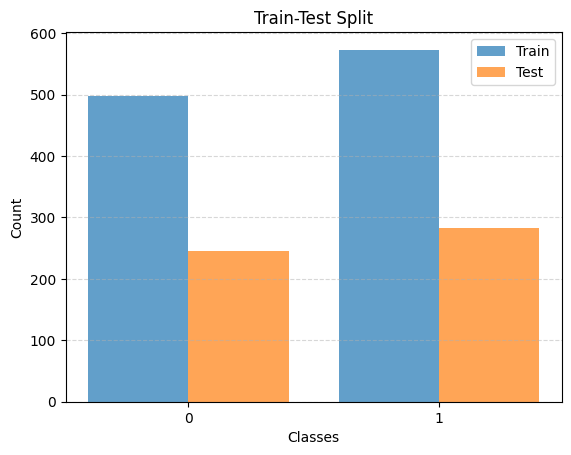

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Count occurrences in train and test sets
names_train, counts_train = np.unique(y_train, return_counts=True)
names_test, counts_test = np.unique(y_test, return_counts=True)

# Plot distribution
bar_width = 0.4
x_labels = np.arange(len(names_train))

plt.bar(x_labels - bar_width/2, counts_train, bar_width, label='Train', alpha=0.7)
plt.bar(x_labels + bar_width/2, counts_test, bar_width, label='Test', alpha=0.7)

plt.xticks(x_labels, names_train)
plt.title("Train-Test Split")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


# 1. Training and predicting with FuzzyCoCo

FuzzyCoCoPython is being developped to match the scikikt-learn API, thus you can use most of the standard lexic of scikit-learn (fit, predict, score) and most of the methods (grid-search, cross-validation).
In the code below you have a description of the (fuzzy logic-based) regression. It is a simple example of how to: 

- Train a model and make a prediction with it
- Save the model in a file
- Visualize the resulting model
- Visualize the predictions

The model bellow is a simple exploration to test two different approaches with FuzzyCoCo. We will optimise the model later. 


In [6]:
from fuzzycocopython import FuzzyCocoClassifier


# Create the model

model = FuzzyCocoClassifier(nbRules=5, maxGenPop1=20, random_state=1)


# Train our classifier and save the model to a file
model.fit(X_train, y_train, output_filename='testFuzzySystem.ffs')

FuzzyCocoClassifier(maxGenPop1=20, nbRules=5, random_state=1)

### Predictions

In [7]:
y_pred = model.predict(X_test)

model.score(X_test, y_test)

0.7253787878787878

### Visualization 

In [8]:
# visualize the rules

model.rules_

[IF (Feature_11 is Low), THEN (OUT is Low),
 IF (Feature_10 is High), THEN (OUT is High),
 IF (Feature_2 is High), THEN (OUT is Low)]

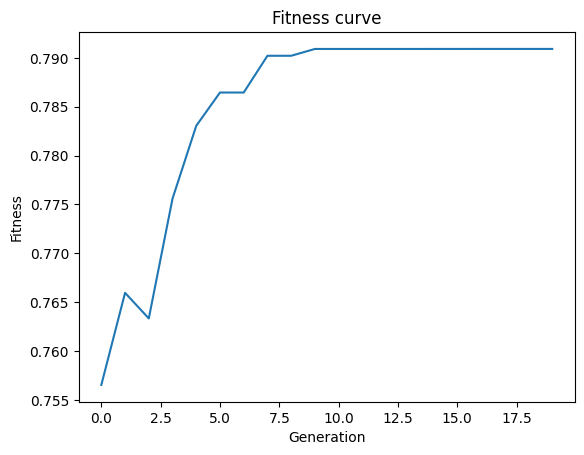

In [9]:
# plot the fitness curve 

plot = model.fitness_history_
plt.plot(plot)
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness curve')
plt.show()

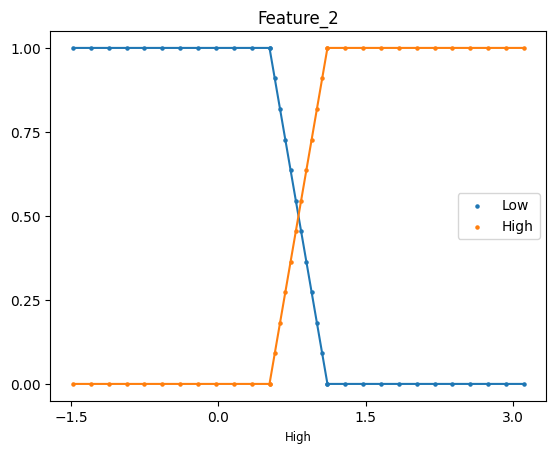

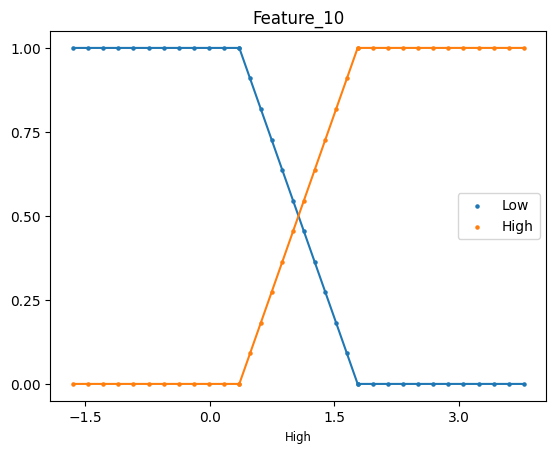

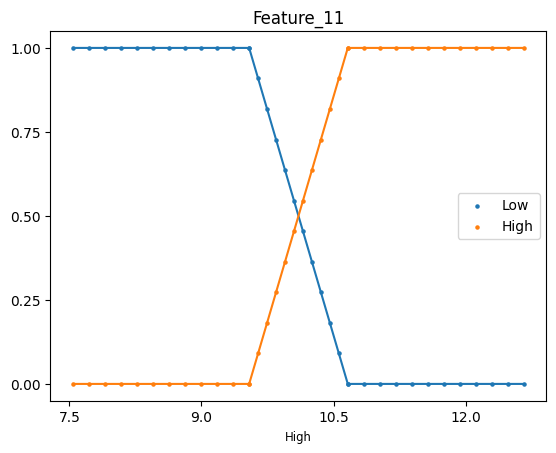

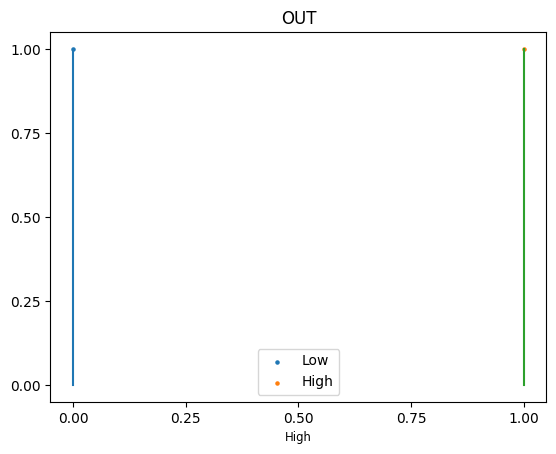

In [10]:
# visualize the fuzzy sets

model.plot_fuzzy_sets()

## Questions


- (1 pt) Décrivez les règles du modèle ?


- (2 pts) Décrivez et commentez la courbe de la fitness : qu'est ce que cela représente ? a-t-on utilisé un nombre suffisant de générations lors de l'entrainement? 


- (2 pts) Décrivez les sets de différentes variables, pourquoi ont-ils tous la même forme? que représentent-ils ?





*Réponse:*

**Question 1**

Le modèle a 3 règles, chaque règle prend une variable linguistique différente en compte, ces variables peuvent soit être "Low" ou "High".

Les variables de sortie sont "Low" ou "High". Il s'agit d'un version ***floue*** de la qualité du vin

**Question 2**

La courbe de la fitness représente la performance du modèle, plus la valeur est haute, mieux c'est. On a fait assez de générations, car la courbe se stabilise.

**Question 3**

On suppose, en lisant la documentation du dataset que Feature_2 = "volatile acidity", Feature_10 = "sulphates" et Feature_11 = "alcohol". Ils ont tous la même forme parce que chaque variable n'a que 2 labels possibles

---
*Réservé pour corrections*
<div class="alert alert-block alert-info">
<b>Corrections: /5 </b>
</div>

Commentaires: 

---
# Exploration des paramètres 

Avec FuzzyCoCo, nous pouvons explorer trois types de paramètres: 
- Les paramètres de la fitness function qui définisse cette fonction en ajustant les poids des caractéristiques tels que l'accuracy ou la sensitivity. 
- Les paramètres de l'évolution avec l'algorithme génétique, comme par exemple la taille de la population.
- Les paramètres du système flou, comme le nombre de règles maximum ou le nombre de variables par règles. 


- Explorer les paramètres du système flou:
    - [fuzzycoco_base.py](https://github.com/arthurbabey/fuzzycocopython/blob/main/fuzzycocopython/fuzzycoco_base.py)
    - [Description des paramètres](fuzzycoco_parameter_description.md)


### Questions

- (5 pts) Décrivez les paramètres suivants en une ou deux phrases avec vos propres mots: 

    - `nbRules`:
    - `nbMaxVarPerRule`:
    - `nbInSets`:
    - `sensitivityW`:
    - `maxGenPop1`:


*Réponse* :

- `nbRules`: le nombre de règles du système
- `nbMaxVarPerRule`: nombre maximal de variables par règles -> nb max de conséquents de la règle
- `nbInSets`: nombre de labels par variable d'entrée
- `sensitivityW`: le poids de la sensitivité dans la courbe de fitness
- `maxGenPop1`: nombre maximal de generations pour la population d'une fonction membre

---

### Exercice

En vous basant sur le code donné en exemple [ici](https://github.com/krypty/trefle/blob/5fc398252bbd762c66e12ead9d6295394ac46bd5/examples/grid_search_example.py)

Pour la recherche de paramètre vous pouvez utiliser l'API de scikit-learn avec sklearn.model_selection.GridSearchCV. Adaptez vos choix pour que les entrainements ne prenne pas de temps, nous vous conseillons de fixer le nombre de génération à 40 (maxGenPop1) et le nombre de fold à 3 (CV) ceci limitera l'évolution et permet de gagner du temps.


- (4 pts) Effectuez une recherche de paramètre (au minimum) les paramètres `nbRules` (3,5 et 6) et `nbMaxVarPerRule` (3, 4 et 5). Vous obtiendrez alors le meilleur système. Vous êtes libres d'explorer d'autres paramètres, si vous voulez y mettre le temps. 
- (4 pts) Explorez les différents résultats obtenus lors de la recherche de paramètre. Sans aller voir les détails de chaque système testés, quels sont les avantages et les inconvénients de ces différents systèmes en terme d'efficacité et d'interprétabilité en fonction des paramètres? Est-ce que çela se voit dans les résultats?
- (4 pts) Affichez le meilleur système (retourné par la grid-search cross-validation) et interprétez le (ses règles). Calculez et commentez sa performance (accuracy, F1 score).
- (2 pts) Expliquez ce qu'est la fonction de fitness : quelle importance à-t-elle lors de l'entrainement? comment est-elle influencé par tous les paramètres qui y sont associés (et décrit dans [ce fichier](fuzzycoco_parameter_description.md))


**Attention** : pour éviter un run trop long vous pouvez utilisez cv=2 et limitez le nombre de générations possible (maxGenPop1) à quelques dizaines. Cela va impacter négativement l'entrainement mais sinon l'exécution prend trop de temps.

*Vous êtes libres de la mise en page de vos réponses, laissez simplement la case pour les corrections à la fin.*

*Réponse:*

In [ ]:
# VOTRE CODE

# Ce code n'a pas encore été testé car son exécution risque de prendre pas mal de temps!
# C'est ici qu'il faut reprendre
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, recall_score, precision_score


fuzzy_estimator = FuzzyCocoClassifier(
    nbRules=None,
    nbMaxVarPerRule=None,
    maxGenPop1=40
)

clf = GridSearchCV(estimator=fuzzy_estimator,
             param_grid={'nbRules': [3,5,6], 'nbMaxVarPerRule': [3,4,5]}, cv=3)
#3clf = GridSearchCV(estimator, tuned_parameters, cv=3)

# Train our classifier
clf.fit(X_train, y_train)

print("Best params: ")
print(clf.best_params_)

---
*Réservé pour corrections*
<div class="alert alert-block alert-info">
<b>Corrections: /19 </b>
</div>

Commentaires:

---
## Logique flou et explicabilité 

### Exercice

À partir du dataset de test, sélectionnez quatre points représentatifs :

- Vrai positif (TP) : Un point correctement prédit comme positif.
- Faux positif (FP) : Un point prédit positif alors qu'il est négatif.
- Vrai négatif (TN) : Un point correctement prédit comme négatif.
- Faux négatif (FN) : Un point prédit négatif alors qu'il est positif.


Pour chaque point sélectionné, effectuez les tâches suivantes :

- Visualisation : Utilisez la méthode plot_aggregated_output pour visualiser l'agrégation des règles et la prédiction et/où la méthode predict_with_importances pour obtenir la contribution de chaque règle dans la décision finale.
- Explication des règles activées : Identifiez quelles règles (ou quels degrés d'appartenance) sont activées pour le point en question.
- Interprétation : Expliquez comment l'activation de ces règles conduit à la prédiction réalisée par le modèle.

In [ ]:
# VOTRE CODE



In [ ]:
# VOTRE CODE



### Questions 

> Vrai Positif :

Quelles règles ont contribué à la prédiction correcte ?
En quoi cette explication renforce-t-elle la confiance dans le modèle ?

> Faux Positif :

Quelles règles ont conduit à la classification erronée ?

> Vrai Négatif :

Comment l'absence ou la faiblesse de certaines règles a permis une prédiction négative correcte ?

> Faux Négatif :

Pourquoi certaines règles n'ont-elles pas suffi à générer une prédiction positive ?

> Synthèse Générale :

En vous appuyant sur les visualisations et analyses précédentes, expliquez en quoi l'explicabilité du modèle permet de comprendre et, potentiellement, d'améliorer ses performances globales.

*Réponse*:

---

## Questions


- (1 pt) Pourquoi un modèle de logique flou est considéré intérprétable ? 


- (1 pt) Quels avantages offrent les modèles basés sur des règles par rapport aux modèles « boîte noire » en termes d'explicabilité ?


- (1 pt) Quelles sont les limites potentielles de l'interprétabilité dans les modèles de logique flou ?

*Réponse:*

---

---
*Réservé pour corrections*
<div class="alert alert-block alert-info">
<b>Corrections: /20 </b>
</div>

Commentaires:

FIN